In [393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


data = pd.read_excel("GAIA IA v.1.2.xlsx")

data.info()

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 82 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                230 non-null    object
 1   Matéria-prima 1 (BP1)     231 non-null    object
 2   Unnamed: 2                231 non-null    object
 3   Unnamed: 3                231 non-null    object
 4   Unnamed: 4                231 non-null    object
 5   Unnamed: 5                231 non-null    object
 6   Unnamed: 6                231 non-null    object
 7   Unnamed: 7                231 non-null    object
 8   Unnamed: 8                231 non-null    object
 9   Unnamed: 9                231 non-null    object
 10  Unnamed: 10               231 non-null    object
 11  Unnamed: 11               231 non-null    object
 12  Matéria-prima 2 (CA)      231 non-null    object
 13  Unnamed: 13               231 non-null    object
 14  Unnamed: 14               

,Unnamed: 0,Matéria-prima 1 (BP1),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Produto (Y),Unnamed: 79,Unnamed: 80,Unnamed: 81
0,NaN,Al2O3,Fe2O3,>63mm,>45mm,CS-C,RMS,A.A.,Carbono,L,...,RMS,A.A.,Carbono,L,a,%,Al2O3,Fe2O3,CS-C,Carbono
1,Exemplo 1,33.196967,2.647673,5.7,6.2,47.754574,11.96993,2.954063,1.39,74.92,...,0,0,0,0,0,0,27.810569,1.580725,6.599695,0.159
2,Exemplo 2,33.196967,2.647673,5.7,6.2,47.754574,11.96993,2.954063,1.39,74.92,...,0,0,0,0,0,0,27.353098,1.6479,6.291125,0.199
3,Exemplo 3,33.196967,2.647673,5.7,6.2,47.754574,11.96993,2.954063,1.39,74.92,...,0,0,0,0,0,0,28.319949,1.38321,5.647089,0.161
4,Exemplo 4,33.196967,2.647673,5.7,6.2,47.754574,11.96993,2.954063,1.39,74.92,...,0,0,0,0,0,0,29.190006,1.680295,6.368125,0.184


In [394]:
data.columns
data = data.drop(data.columns[0], axis=1)
# data.drop(index=0, inplace=True)
data.head()


,Matéria-prima 1 (BP1),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Produto (Y),Unnamed: 79,Unnamed: 80,Unnamed: 81
0,Al2O3,Fe2O3,>63mm,>45mm,CS-C,RMS,A.A.,Carbono,L,a,...,RMS,A.A.,Carbono,L,a,%,Al2O3,Fe2O3,CS-C,Carbono
1,33.196967,2.647673,5.7,6.2,47.754574,11.96993,2.954063,1.39,74.92,5.18,...,0,0,0,0,0,0,27.810569,1.580725,6.599695,0.159
2,33.196967,2.647673,5.7,6.2,47.754574,11.96993,2.954063,1.39,74.92,5.18,...,0,0,0,0,0,0,27.353098,1.6479,6.291125,0.199
3,33.196967,2.647673,5.7,6.2,47.754574,11.96993,2.954063,1.39,74.92,5.18,...,0,0,0,0,0,0,28.319949,1.38321,5.647089,0.161
4,33.196967,2.647673,5.7,6.2,47.754574,11.96993,2.954063,1.39,74.92,5.18,...,0,0,0,0,0,0,29.190006,1.680295,6.368125,0.184


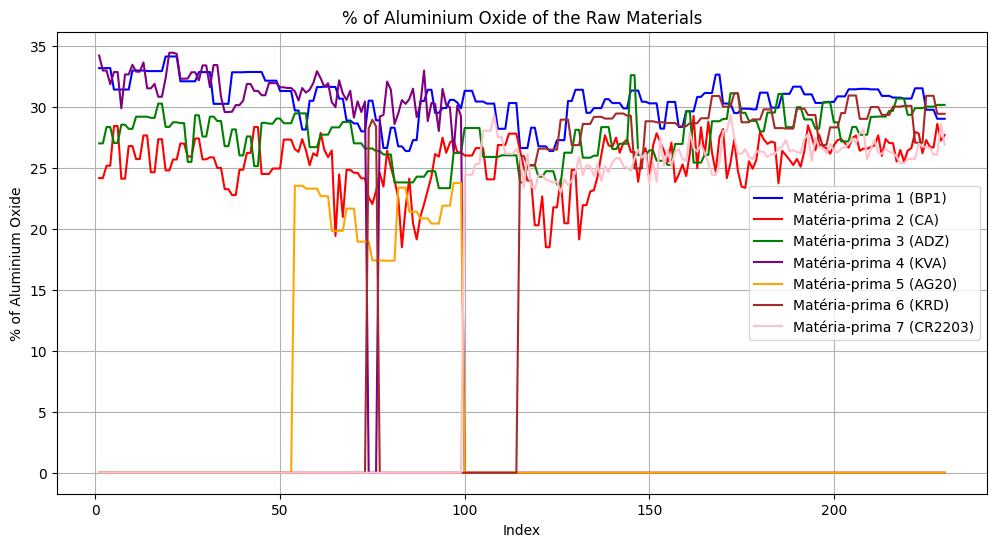

In [395]:
columns = [
    "Matéria-prima 1 (BP1)",
    "Matéria-prima 2 (CA)",
    "Matéria-prima 3 (ADZ)",
    "Matéria-prima 4 (KVA)",
    "Matéria-prima 5 (AG20)",
    "Matéria-prima 6 (KRD)",
    "Matéria-prima 7 (CR2203)"   
]

legend_labels = [
    "Matéria-prima 1 (BP1)",
    "Matéria-prima 2 (CA)",
    "Matéria-prima 3 (ADZ)",
    "Matéria-prima 4 (KVA)",
    "Matéria-prima 5 (AG20)",
    "Matéria-prima 6 (KRD)",
    "Matéria-prima 7 (CR2203)"   
]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")


colors = ["blue", "red", "green", "purple", "orange", "brown", "pink"]

plt.figure(figsize=(12, 6))


for i, col in enumerate(columns):
    plt.plot(data.index, data[col], linestyle='-', color=colors[i], label=legend_labels[i])

plt.xlabel("Index")
plt.ylabel("% of Aluminium Oxide")
plt.title("% of Aluminium Oxide of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()

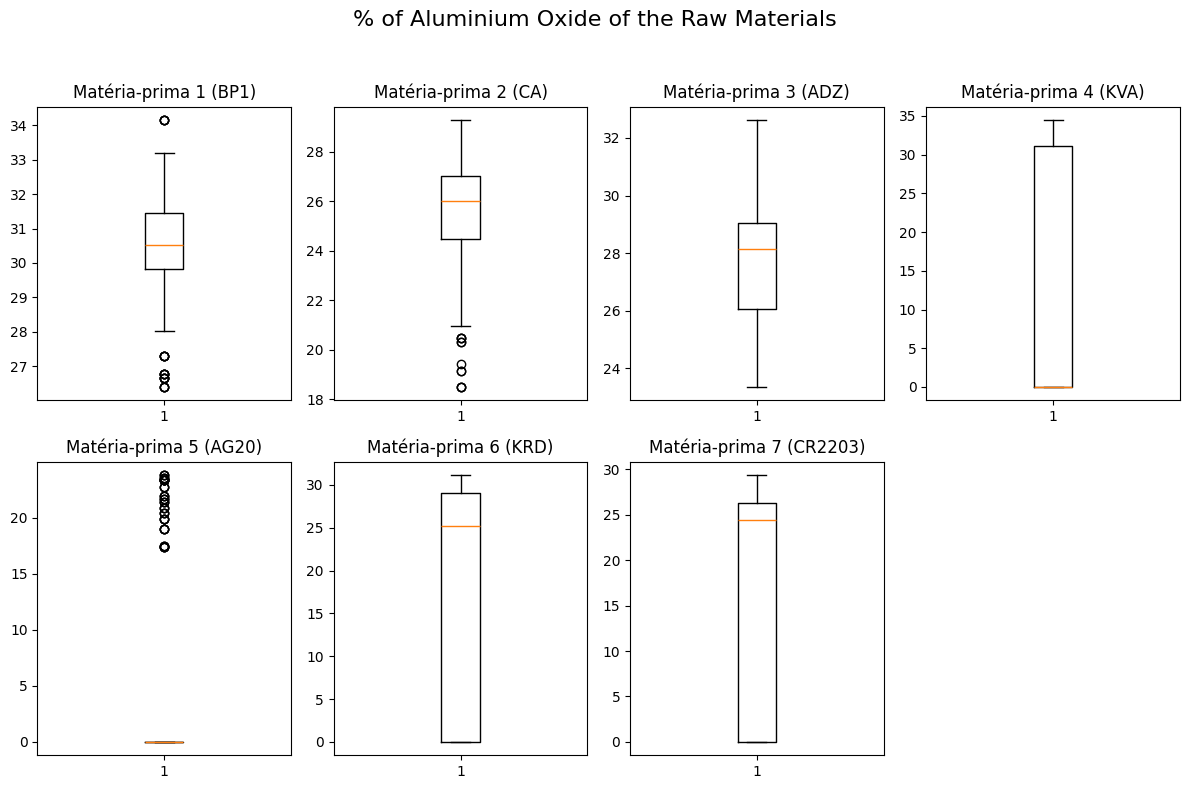

In [396]:
fig, axs = plt.subplots(2, 4, figsize=(12, 8))

for i, col in enumerate(columns):
    row = i // 4
    col_index = i % 4
    axs[row, col_index].boxplot(data[col].dropna())
    axs[row, col_index].set_title(legend_labels[i])

fig.delaxes(axs[1, 3])

plt.suptitle("% of Aluminium Oxide of the Raw Materials", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()


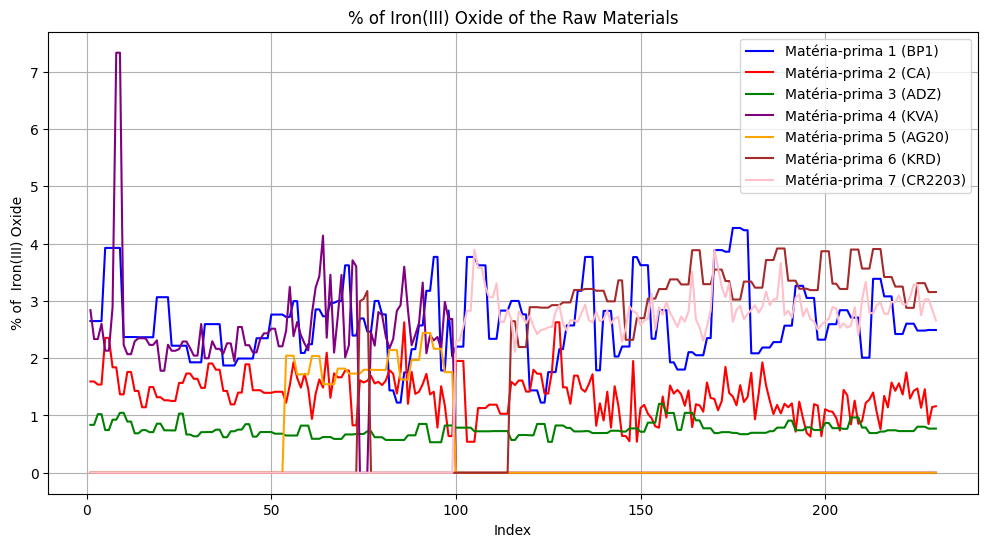

In [397]:
columns = [
    "Unnamed: 2",
    "Unnamed: 13",
    "Unnamed: 24",
    "Unnamed: 35",
    "Unnamed: 46",
    "Unnamed: 57",
    "Unnamed: 68",
]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

plt.figure(figsize=(12, 6))

for i, col in enumerate(columns):
    plt.plot(data.index, data[col], linestyle='-', color=colors[i], label=legend_labels[i])

plt.xlabel("Index")
plt.ylabel("% of  Iron(III) Oxide")
plt.title("% of Iron(III) Oxide of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()

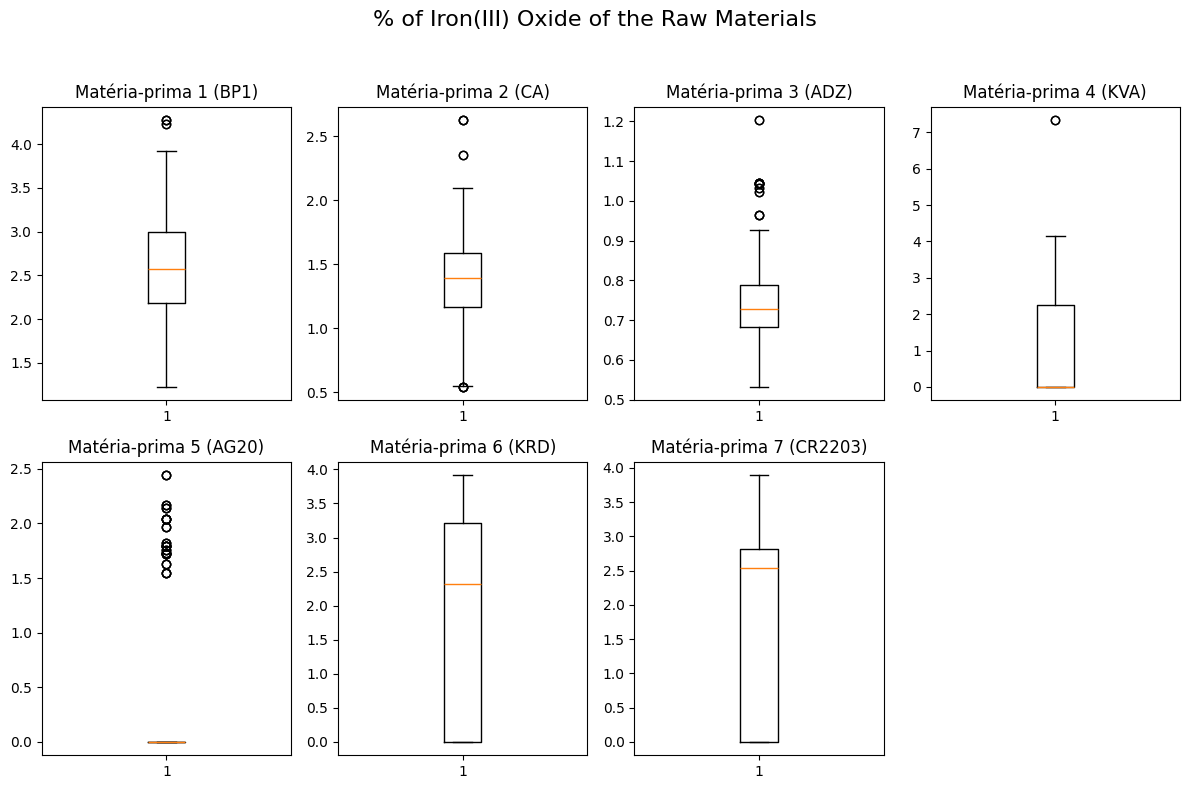

In [398]:
fig, axs = plt.subplots(2, 4, figsize=(12, 8))

for i, col in enumerate(columns):
    row = i // 4
    col_index = i % 4
    axs[row, col_index].boxplot(data[col].dropna())
    axs[row, col_index].set_title(legend_labels[i])

fig.delaxes(axs[1, 3])

plt.suptitle("% of Iron(III) Oxide of the Raw Materials", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()


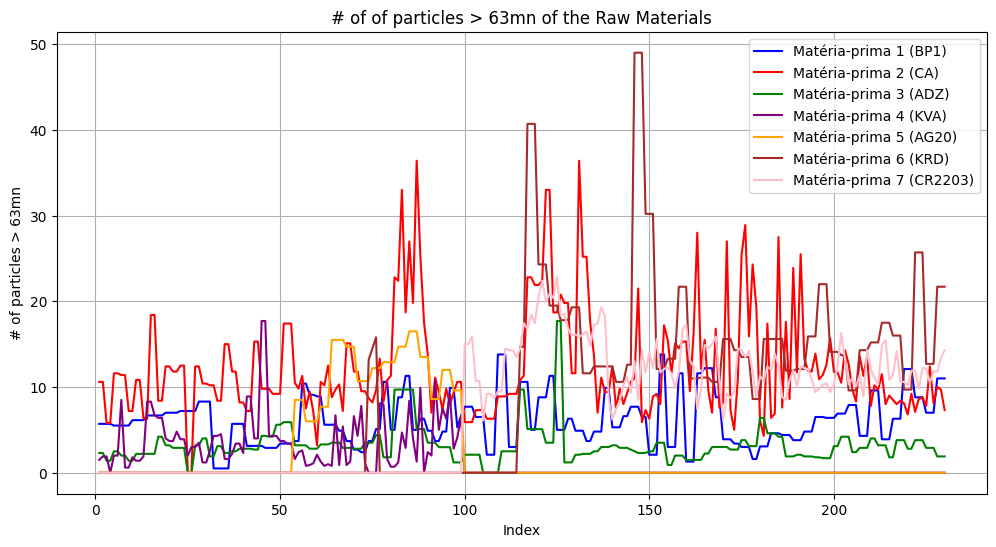

In [399]:
columns = [
    "Unnamed: 3",
    "Unnamed: 14",
    "Unnamed: 25",
    "Unnamed: 36",
    "Unnamed: 47",
    "Unnamed: 58",
    "Unnamed: 69",
]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

plt.figure(figsize=(12, 6))

for i, col in enumerate(columns):
    plt.plot(data.index, data[col],  linestyle='-', color=colors[i], label=legend_labels[i])

plt.xlabel("Index")
plt.ylabel("# of particles > 63mn")
plt.title("# of of particles > 63mn of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()

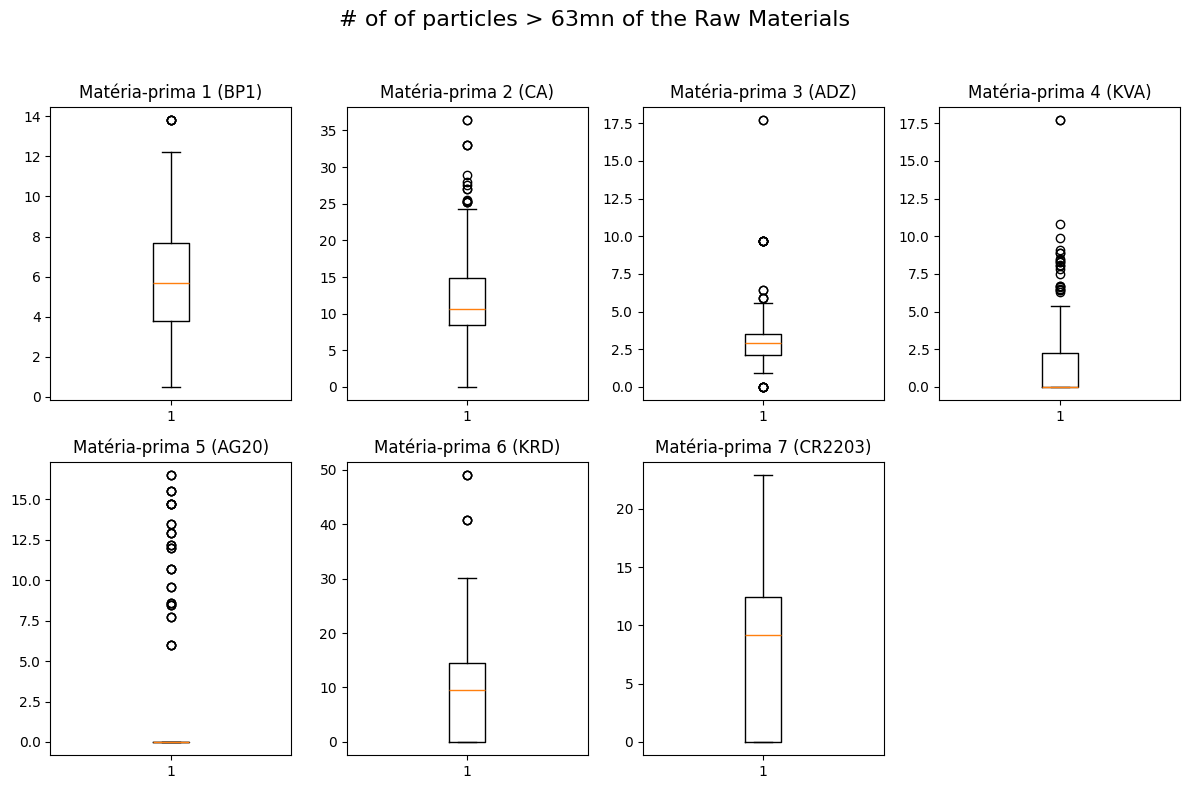

In [400]:
fig, axs = plt.subplots(2, 4, figsize=(12, 8))

for i, col in enumerate(columns):
    row = i // 4
    col_index = i % 4
    axs[row, col_index].boxplot(data[col].dropna())
    axs[row, col_index].set_title(legend_labels[i])

fig.delaxes(axs[1, 3])

plt.suptitle("# of of particles > 63mn of the Raw Materials", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

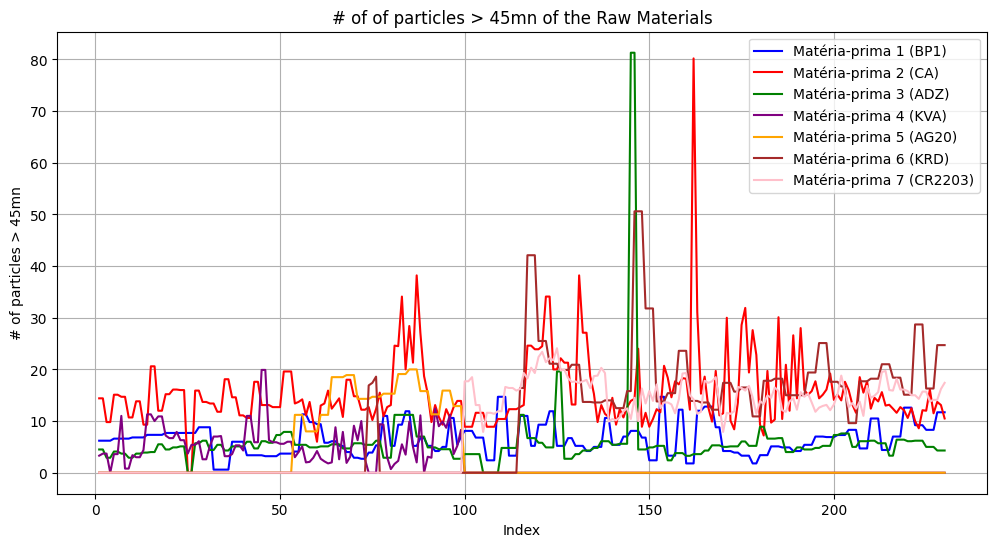

In [401]:
columns = [
    "Unnamed: 4",
    "Unnamed: 15",
    "Unnamed: 26",
    "Unnamed: 37",
    "Unnamed: 48",
    "Unnamed: 59",
    "Unnamed: 70",
]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

plt.figure(figsize=(12, 6))

for i, col in enumerate(columns):
    plt.plot(data.index, data[col],  linestyle='-', color=colors[i], label=legend_labels[i])


plt.xlabel("Index")
plt.ylabel("# of particles > 45mn")
plt.title("# of of particles > 45mn of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()

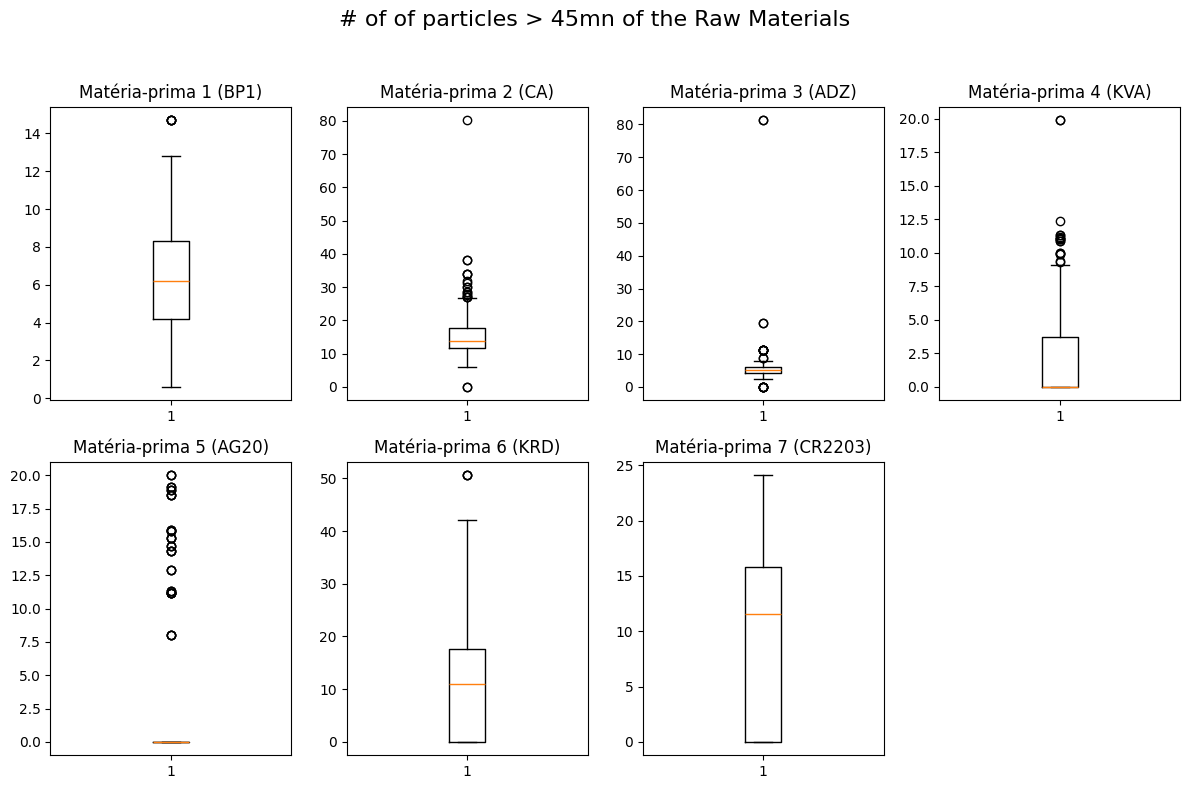

In [402]:
fig, axs = plt.subplots(2, 4, figsize=(12, 8))

for i, col in enumerate(columns):
    row = i // 4
    col_index = i % 4
    axs[row, col_index].boxplot(data[col].dropna())
    axs[row, col_index].set_title(legend_labels[i])

fig.delaxes(axs[1, 3])

plt.suptitle("# of of particles > 45mn of the Raw Materials", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

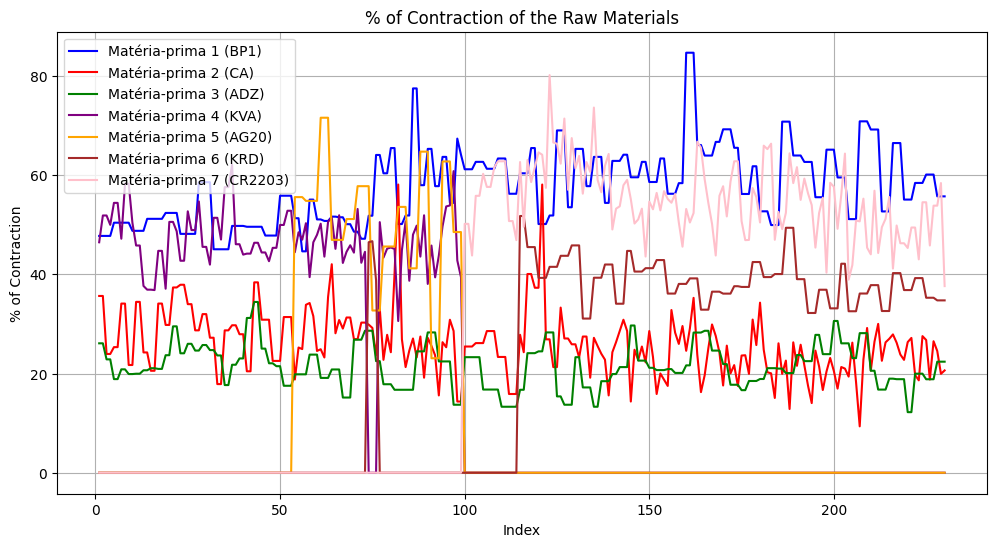

In [403]:
columns = [
    "Unnamed: 5",
    "Unnamed: 16",
    "Unnamed: 27",
    "Unnamed: 38",
    "Unnamed: 49",
    "Unnamed: 60",
    "Unnamed: 71",
]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

plt.figure(figsize=(12, 6))

for i, col in enumerate(columns):
    plt.plot(data.index, data[col], linestyle='-', color=colors[i], label=legend_labels[i])

plt.xlabel("Index")
plt.ylabel("% of Contraction")
plt.title("% of Contraction of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()

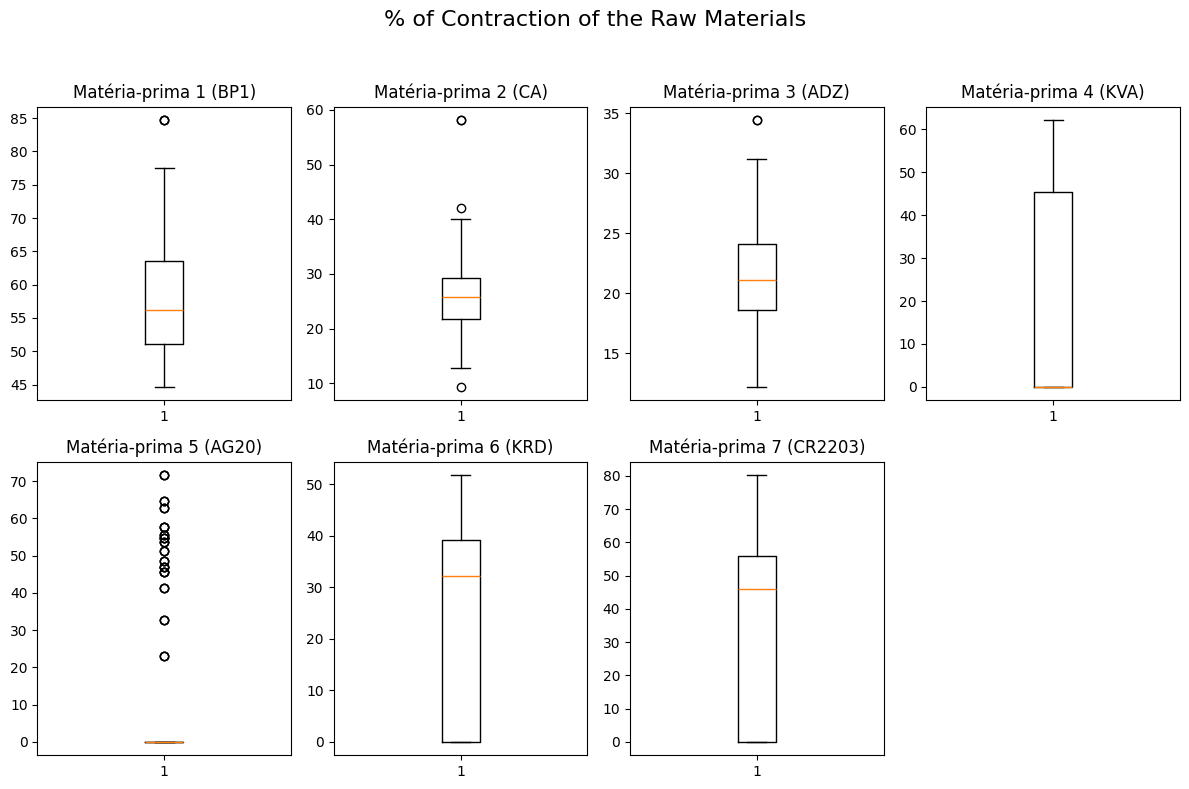

In [404]:
fig, axs = plt.subplots(2, 4, figsize=(12, 8))

for i, col in enumerate(columns):
    row = i // 4
    col_index = i % 4
    axs[row, col_index].boxplot(data[col].dropna())
    axs[row, col_index].set_title(legend_labels[i])

fig.delaxes(axs[1, 3])

plt.suptitle("% of Contraction of the Raw Materials", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

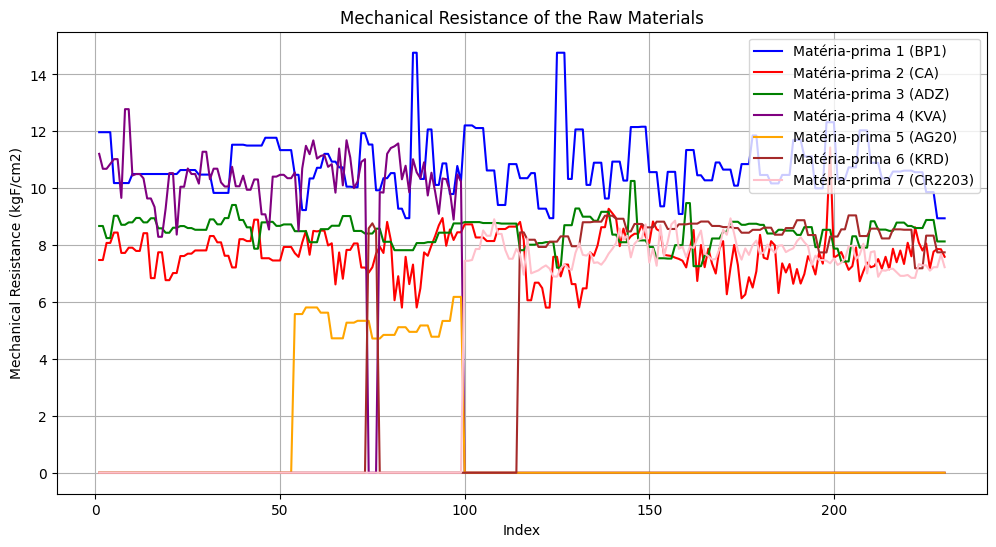

In [405]:
columns = [
    "Unnamed: 6",
    "Unnamed: 17",
    "Unnamed: 28",
    "Unnamed: 39",
    "Unnamed: 50",
    "Unnamed: 61",
    "Unnamed: 72",
]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

markers = ["o", "s", "D", "^", "v", "*", "x"]
colors = ["blue", "red", "green", "purple", "orange", "brown", "pink"]

plt.figure(figsize=(12, 6))

for i, col in enumerate(columns):
    plt.plot(data.index, data[col], linestyle='-', color=colors[i], label=legend_labels[i])

plt.xlabel("Index")
plt.ylabel("Mechanical Resistance (kgF/cm2)")
plt.title("Mechanical Resistance of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()

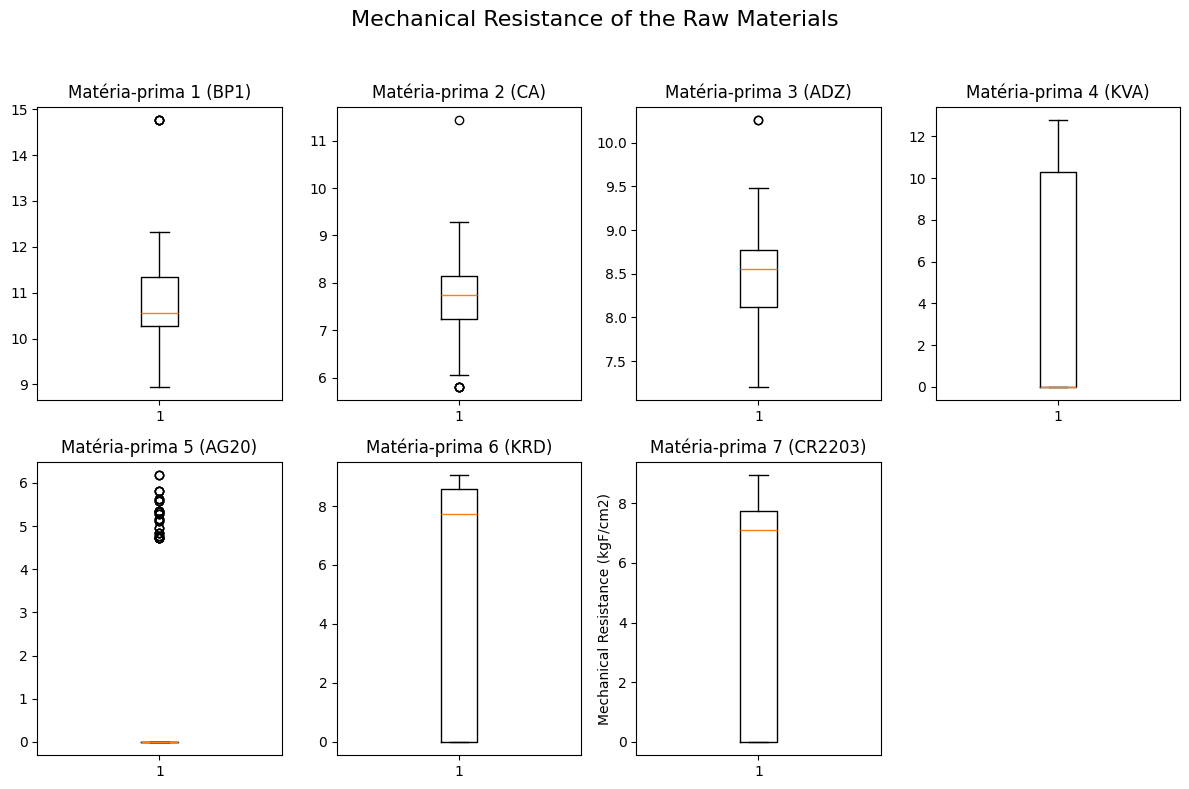

In [406]:
fig, axs = plt.subplots(2, 4, figsize=(12, 8))

for i, col in enumerate(columns):
    row = i // 4
    col_index = i % 4
    axs[row, col_index].boxplot(data[col].dropna())
    axs[row, col_index].set_title(legend_labels[i])

fig.delaxes(axs[1, 3])

plt.ylabel("Mechanical Resistance (kgF/cm2)")
plt.suptitle("Mechanical Resistance of the Raw Materials", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

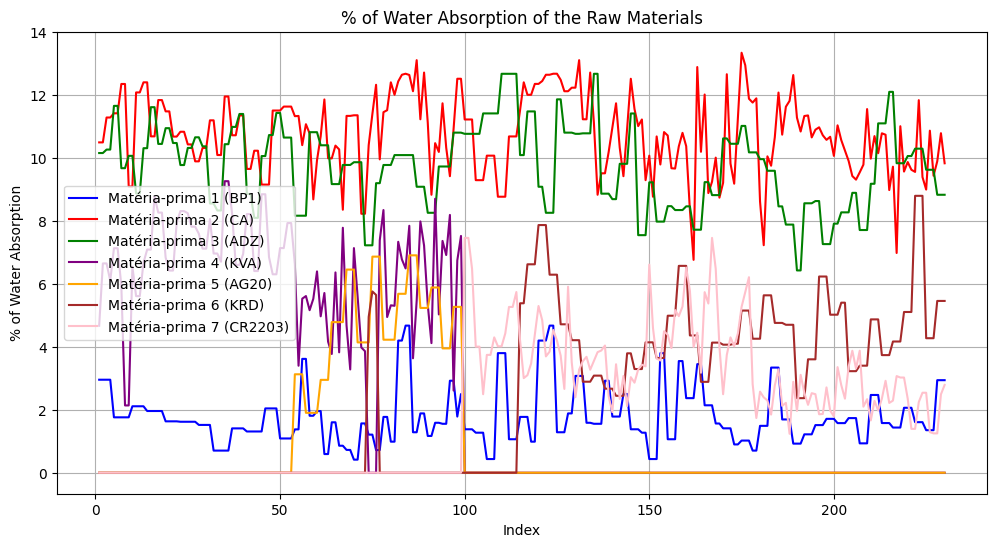

In [407]:
columns = [
    "Unnamed: 7",
    "Unnamed: 18",
    "Unnamed: 29",
    "Unnamed: 40",
    "Unnamed: 51",
    "Unnamed: 62",
    "Unnamed: 73",
]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

plt.figure(figsize=(12, 6))

for i, col in enumerate(columns):
    plt.plot(data.index, data[col],  linestyle='-', color=colors[i], label=legend_labels[i])


plt.xlabel("Index")
plt.ylabel("% of Water Absorption")
plt.title("% of Water Absorption of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()

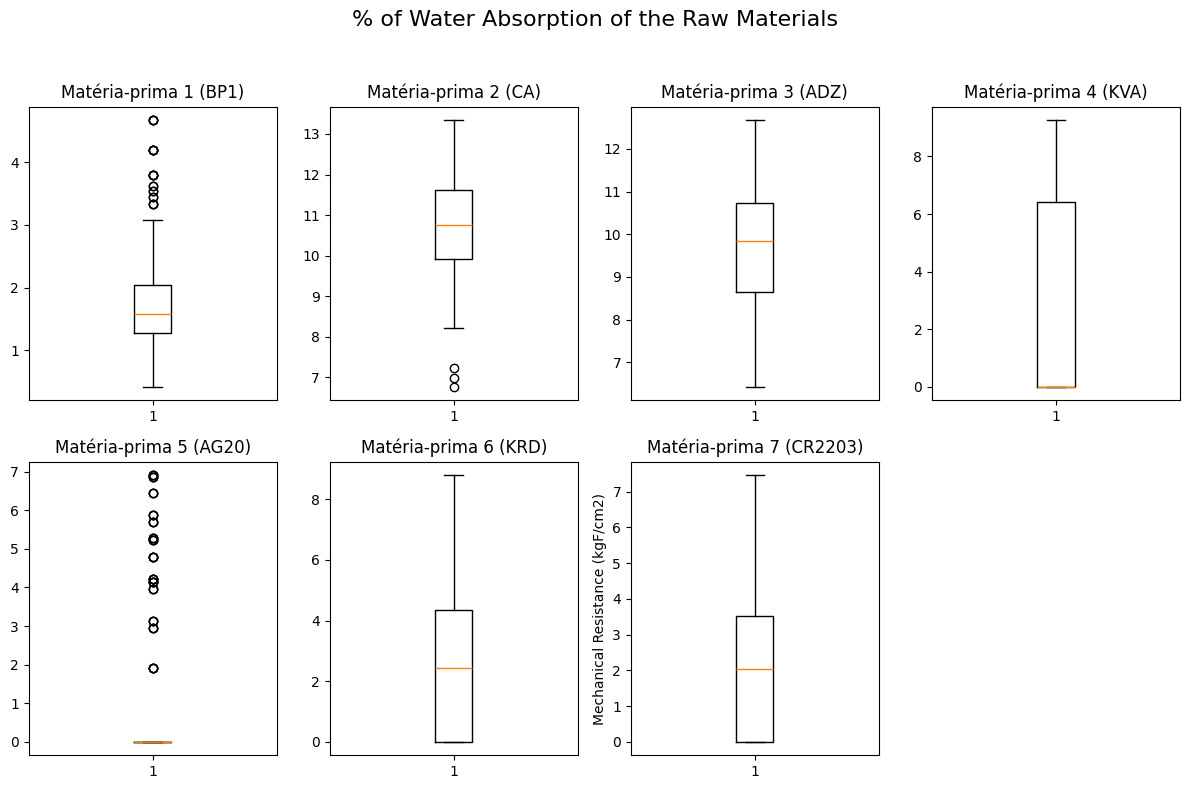

In [408]:
fig, axs = plt.subplots(2, 4, figsize=(12, 8))

for i, col in enumerate(columns):
    row = i // 4
    col_index = i % 4
    axs[row, col_index].boxplot(data[col].dropna())
    axs[row, col_index].set_title(legend_labels[i])

fig.delaxes(axs[1, 3])

plt.ylabel("Mechanical Resistance (kgF/cm2)")
plt.suptitle("% of Water Absorption of the Raw Materials", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

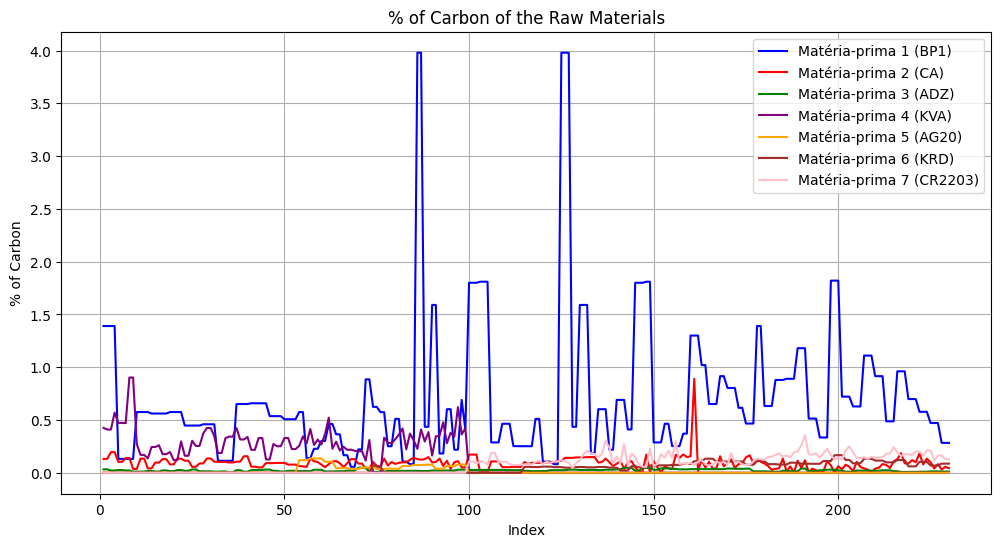

In [409]:
columns = [
    "Unnamed: 8",
    "Unnamed: 19",
    "Unnamed: 30",
    "Unnamed: 41",
    "Unnamed: 52",
    "Unnamed: 63",
    "Unnamed: 74",]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

plt.figure(figsize=(12, 6))


for i, col in enumerate(columns):
    plt.plot(data.index, data[col],  linestyle='-', color=colors[i], label=legend_labels[i])

plt.xlabel("Index")
plt.ylabel("% of Carbon")
plt.title("% of Carbon of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()

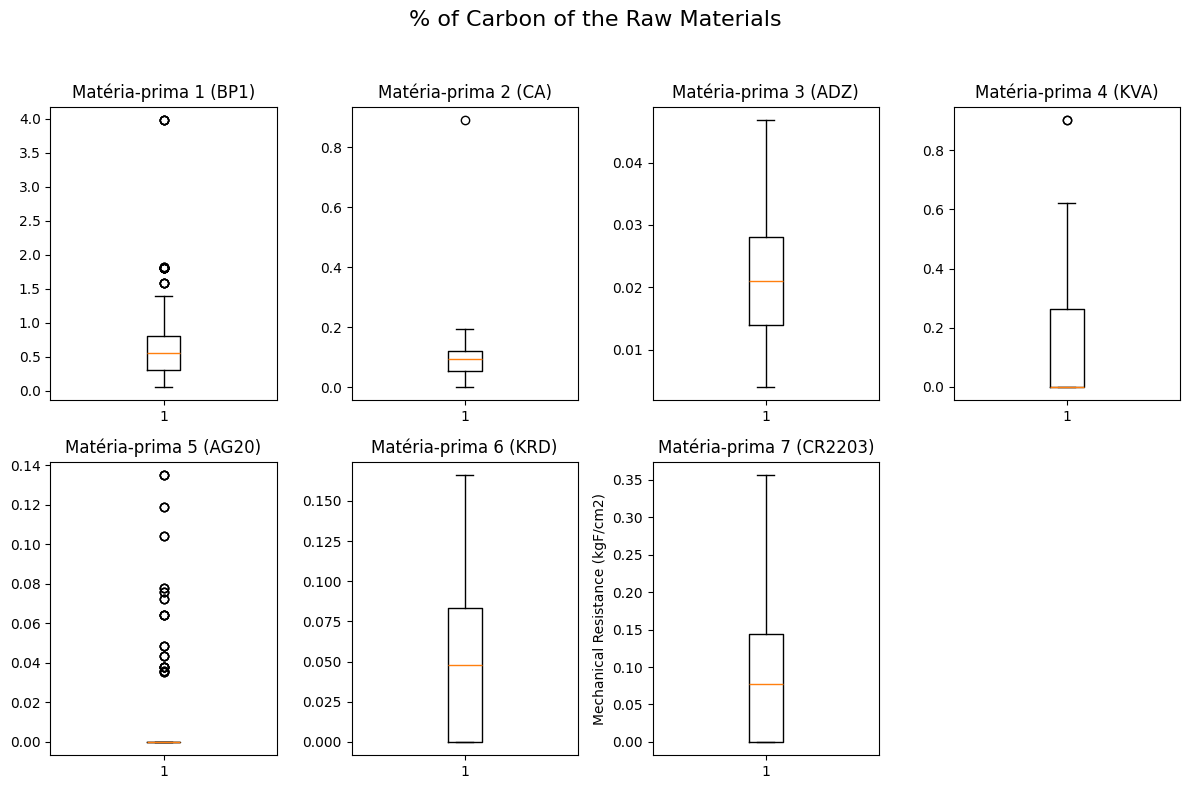

In [410]:
fig, axs = plt.subplots(2, 4, figsize=(12, 8))

for i, col in enumerate(columns):
    row = i // 4
    col_index = i % 4
    axs[row, col_index].boxplot(data[col].dropna())
    axs[row, col_index].set_title(legend_labels[i])

fig.delaxes(axs[1, 3])

plt.ylabel("Mechanical Resistance (kgF/cm2)")
plt.suptitle("% of Carbon of the Raw Materials", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

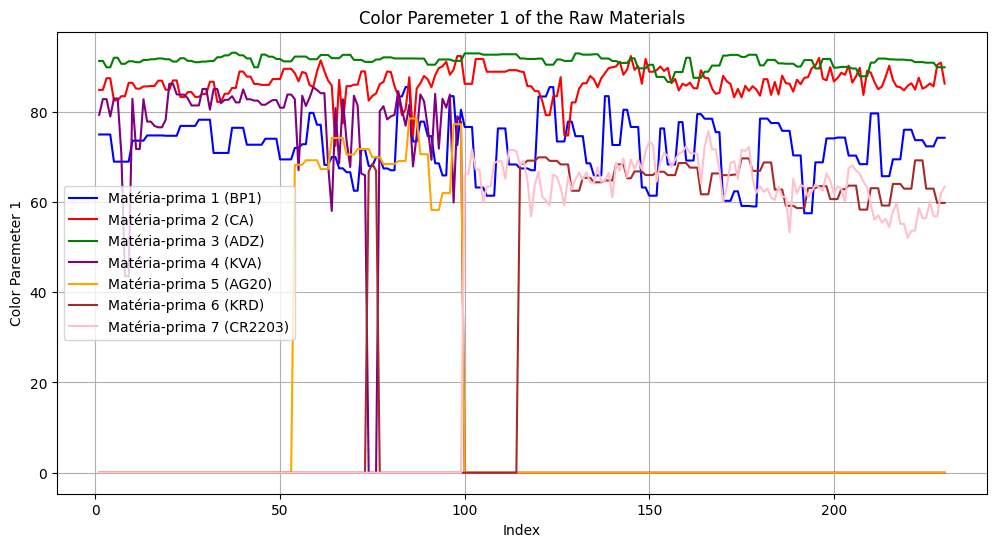

In [411]:
columns = [
    "Unnamed: 9",
    "Unnamed: 20",
    "Unnamed: 31",
    "Unnamed: 42",
    "Unnamed: 53",
    "Unnamed: 64",
    "Unnamed: 75",
]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")
plt.figure(figsize=(12, 6))

for i, col in enumerate(columns):
    plt.plot(data.index, data[col],  linestyle='-', color=colors[i], label=legend_labels[i])

plt.xlabel("Index")
plt.ylabel("Color Paremeter 1")
plt.title("Color Paremeter 1 of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()

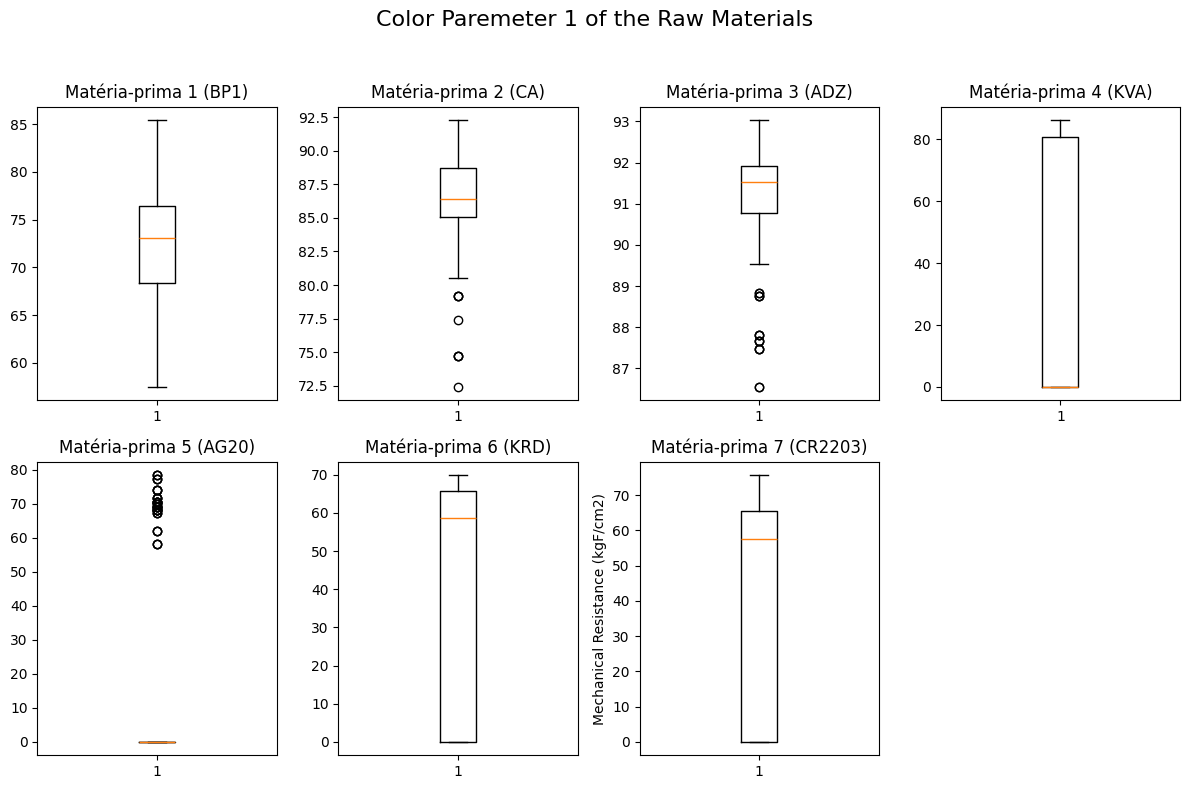

In [412]:

fig, axs = plt.subplots(2, 4, figsize=(12, 8))

for i, col in enumerate(columns):
    row = i // 4
    col_index = i % 4
    axs[row, col_index].boxplot(data[col].dropna())
    axs[row, col_index].set_title(legend_labels[i])

fig.delaxes(axs[1, 3])

plt.ylabel("Mechanical Resistance (kgF/cm2)")
plt.suptitle("Color Paremeter 1 of the Raw Materials", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

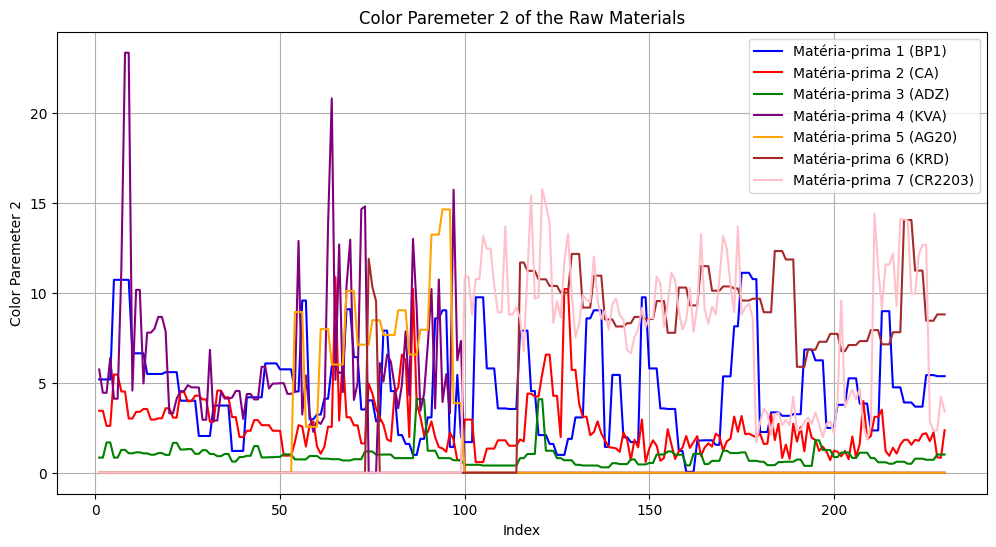

In [413]:
columns = [
    "Unnamed: 10",
    "Unnamed: 21",
    "Unnamed: 32",
    "Unnamed: 43",
    "Unnamed: 54",
    "Unnamed: 65",
    "Unnamed: 76",
]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

plt.figure(figsize=(12, 6))

for i, col in enumerate(columns):
    plt.plot(data.index, data[col],  linestyle='-', color=colors[i], label=legend_labels[i])

plt.xlabel("Index")
plt.ylabel("Color Paremeter 2")
plt.title("Color Paremeter 2 of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()

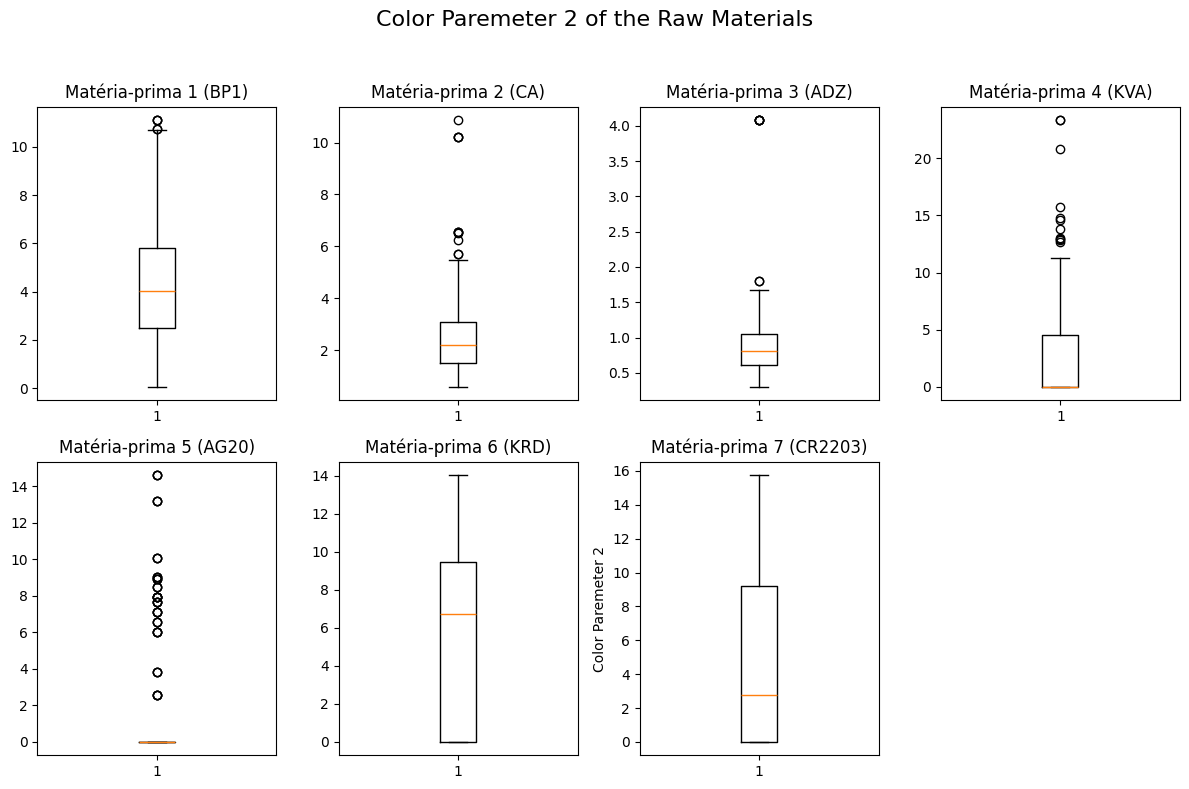

In [414]:

fig, axs = plt.subplots(2, 4, figsize=(12, 8))

for i, col in enumerate(columns):
    row = i // 4
    col_index = i % 4
    axs[row, col_index].boxplot(data[col].dropna())
    axs[row, col_index].set_title(legend_labels[i])

fig.delaxes(axs[1, 3])

plt.ylabel("Color Paremeter 2")
plt.suptitle("Color Paremeter 2 of the Raw Materials", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

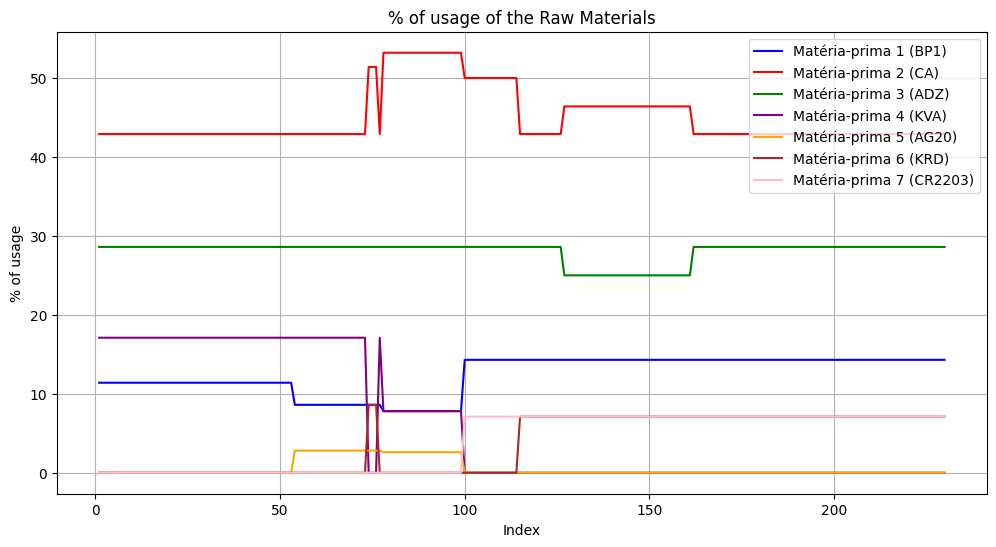

In [415]:
columns = [
    "Unnamed: 11",
    "Unnamed: 22",
    "Unnamed: 33",
    "Unnamed: 44",
    "Unnamed: 55",
    "Unnamed: 66",
    "Unnamed: 77",
]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

plt.figure(figsize=(12, 6))

for i, col in enumerate(columns):
    plt.plot(data.index, data[col],  linestyle='-', color=colors[i], label=legend_labels[i])

plt.xlabel("Index")
plt.ylabel("% of usage")
plt.title("% of usage of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()

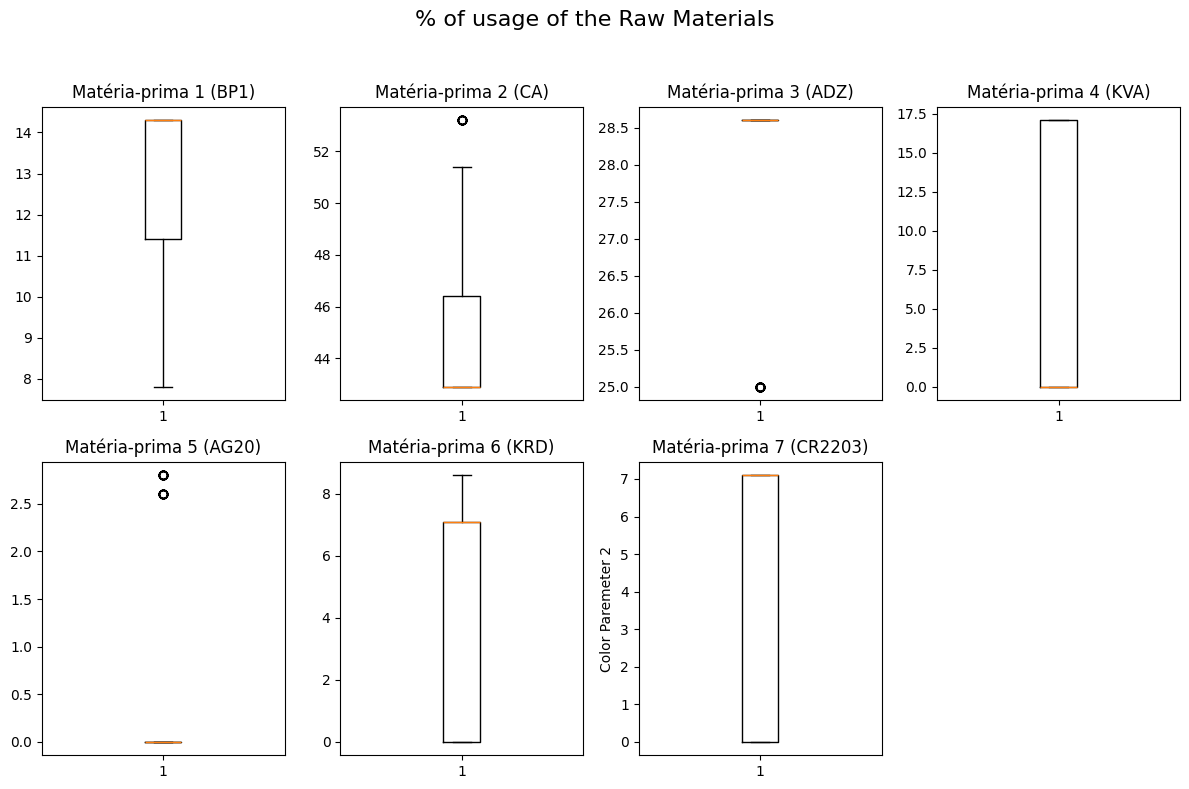

In [416]:

fig, axs = plt.subplots(2, 4, figsize=(12, 8))

for i, col in enumerate(columns):
    row = i // 4
    col_index = i % 4
    axs[row, col_index].boxplot(data[col].dropna())
    axs[row, col_index].set_title(legend_labels[i])

fig.delaxes(axs[1, 3])

plt.ylabel("Color Paremeter 2")
plt.suptitle("% of usage of the Raw Materials", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

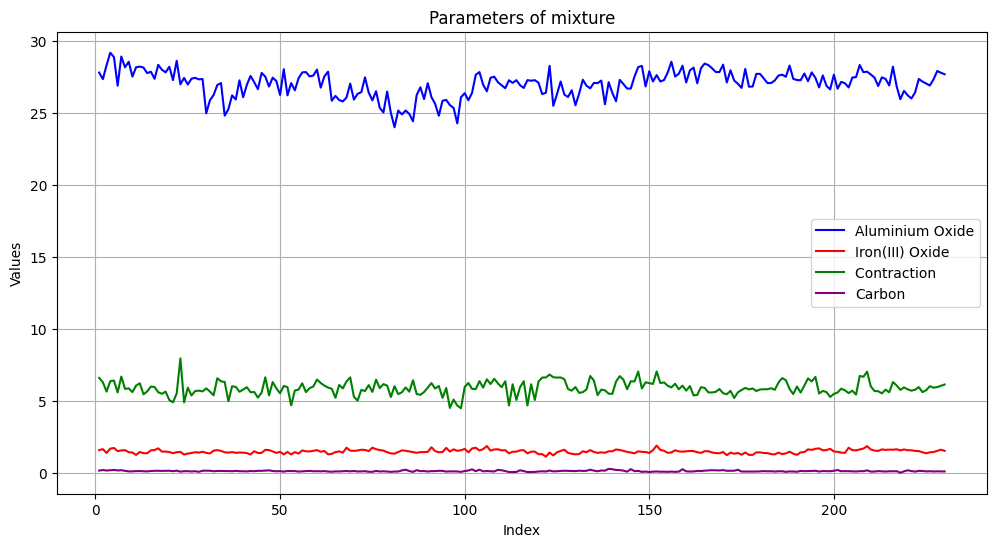

In [417]:
columns = [
    "Produto (Y)",
    "Unnamed: 79",
    "Unnamed: 80",
    "Unnamed: 81",
]

legend_labels = ["Aluminium Oxide", "Iron(III) Oxide", "Contraction ", "Carbon"]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

plt.figure(figsize=(12, 6))

for i, col in enumerate(columns):
    plt.plot(data.index, data[col], linestyle='-', color=colors[i], label=legend_labels[i])

plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Parameters of mixture")
plt.legend()
plt.grid(True)

plt.show()

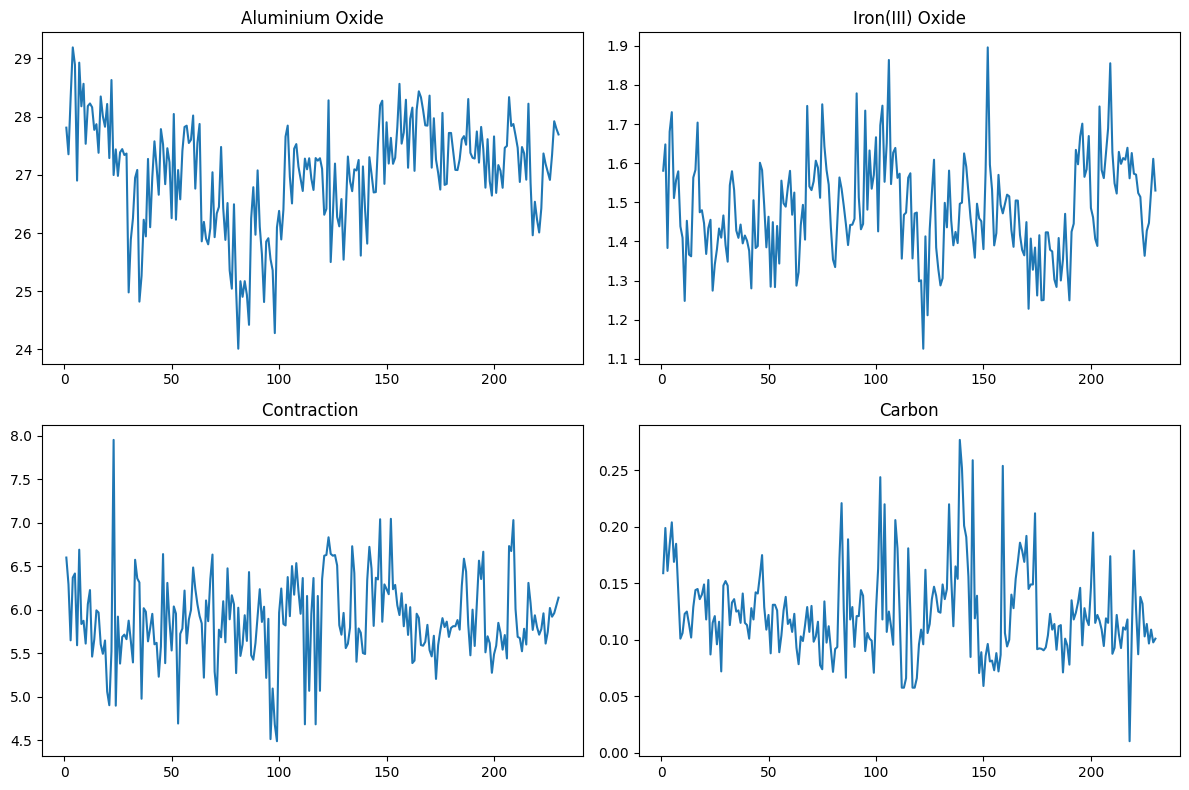

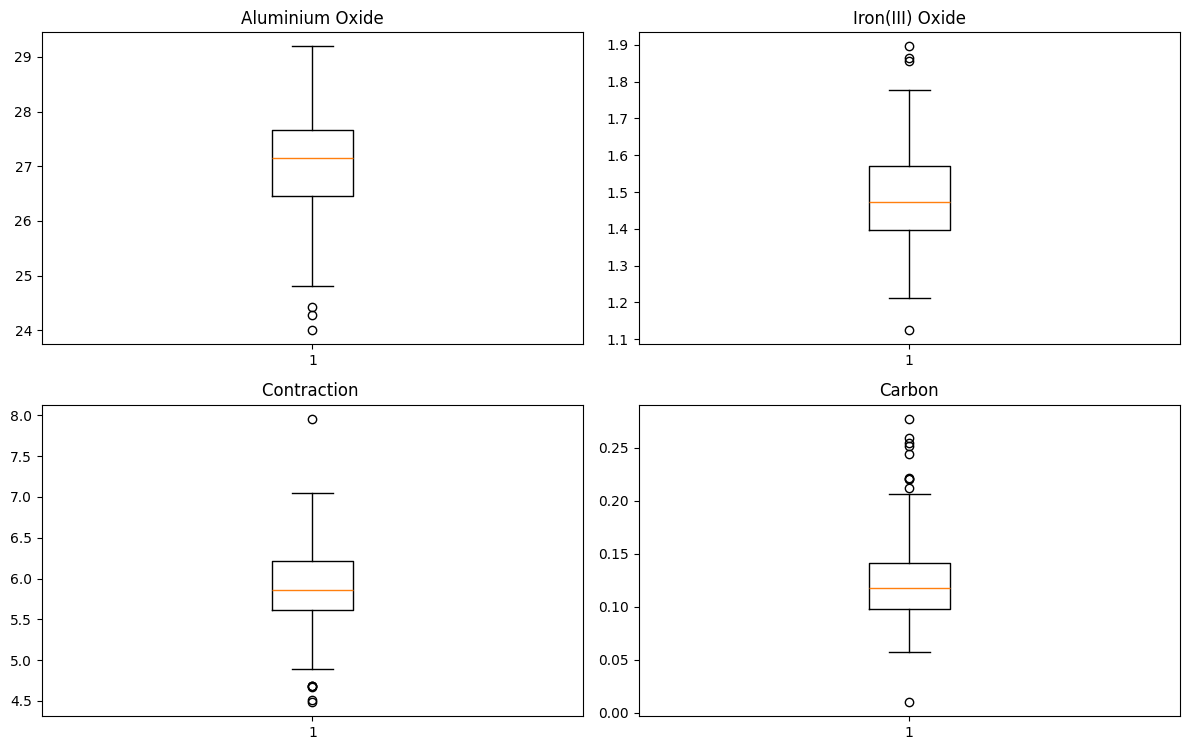

In [418]:

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, col in enumerate(columns):
    row = i // 2
    col_index = i % 2
    axs[row, col_index].plot(data.index, data[col])
    axs[row, col_index].set_title(legend_labels[i])

plt.tight_layout()
plt.show()


fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, col in enumerate(columns):
    row = i // 2
    col_index = i % 2
    axs[row, col_index].boxplot(data[col].dropna())
    axs[row, col_index].set_title(legend_labels[i])

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()


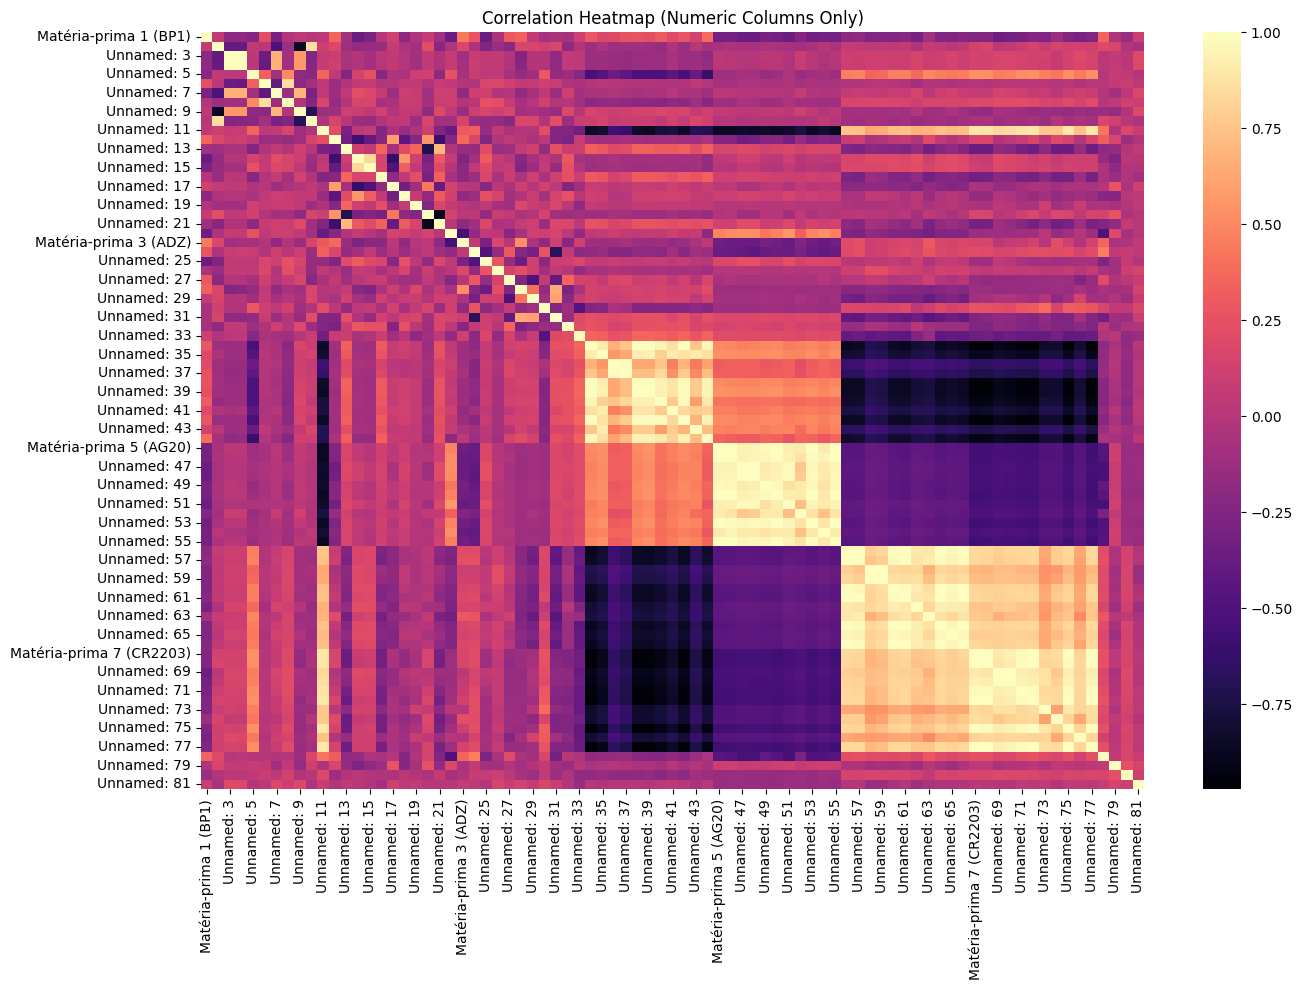

In [419]:
data_numeric = data.apply(pd.to_numeric, errors='coerce')
numeric_data = data_numeric.dropna(axis=1, thresh=len(data_numeric) * 0.5)

corr_matrix = numeric_data.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='magma', annot=False, fmt=".2f", center=0)
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.tight_layout()
plt.show()


sem simbolos
boxplots e histo
corr matrix 
4 subplots individuais
Normalizar dados

1 state of the art
data anali
models used
conslusions


In [420]:
target_columns = ["Produto (Y)", "Unnamed: 79", "Unnamed: 80", "Unnamed: 81"]
y_targets = data[target_columns]

X = data.drop(columns=target_columns)
y = data[target_columns]


X = X.dropna()
y = y.loc[X.index]  



splits = {}

for col in target_columns:
    X_train, X_test, y_train, y_test = train_test_split(X, y[col], test_size=0.2, random_state=42)
    splits[col] = {
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test
    }


for col in target_columns:
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(splits[col]["X_train"])
    X_test_scaled = scaler.transform(splits[col]["X_test"])

    splits[col]["X_train_scaled"] = X_train_scaled
    splits[col]["X_test_scaled"] = X_test_scaled


In [421]:
missing_by_column = X.isnull().sum()
missing_by_column[missing_by_column > 0]


Series([], dtype: int64)

In [422]:
nan_cells = X.isnull()
nan_coords = [(row, col) for row in nan_cells.index for col in nan_cells.columns if nan_cells.loc[row, col]]


In [423]:
nan_positions = nan_cells.stack()[nan_cells.stack()].reset_index()
nan_positions.columns = ['Row', 'Column', 'IsNaN']

In [424]:
data[target_columns].isnull().sum().sum()  # Check if targets have NaNs
data.drop(columns=target_columns).isnull().sum().sum()  # Check if inputs have NaNs


np.int64(77)

In [425]:




models = {}
results = {}

for target, data_split in splits.items():
    model = LinearRegression()
    model.fit(data_split["X_train"], data_split["y_train"])
    
    y_pred = model.predict(data_split["X_test"])
    
    
    models[target] = model

    
    mse = mean_squared_error(data_split["y_test"], y_pred)
    r2 = r2_score(data_split["y_test"], y_pred)
    
    results[target] = {
        "MSE": mse,
        "R²": r2,
        "Predictions": y_pred
    }

    print(f"\n {target}")
    print(f"   MSE: {mse:.4f}")
    print(f"   R² Score: {r2:.4f}")



 Produto (Y)
   MSE: 0.3515
   R² Score: 0.4969

 Unnamed: 79
   MSE: 0.0197
   R² Score: -0.7250

 Unnamed: 80
   MSE: 0.4260
   R² Score: -1.2923

 Unnamed: 81
   MSE: 0.0020
   R² Score: -0.0133
